In [3]:
import numpy as np
import natsort
import cv2
import os
import matplotlib.pyplot as plt
from glob import glob

In [4]:
def sortlist(filelist):
    filelist = natsort.natsorted(filelist)
    return filelist

In [18]:
class image_processing():
    def __init__(self, path_list, save_path,is_raw):
        self.rgb_img_path = path_list
        self.save_path = save_path
        self.is_raw = is_raw
        self.img_zero_padding(self.rgb_img_path,is_raw)
    
    def labeling(self,img):
        r = np.array([255, 0, 0])
        g = np.array([0, 255, 0])
        y = np.array([255, 255, 0])

        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        label_seg = np.zeros((img.shape[:2]), dtype=np.int)
        label_seg[(img==r).all(axis=2)] = 50
        label_seg[(img==g).all(axis=2)] = 30
        label_seg[(img==y).all(axis=2)] = 10
        label_seg = label_seg[:,:, np.newaxis]

        return label_seg

    def img_zero_padding(self, path,is_raw):
        file_cnt = 0
        for file_path in path:
            file_cnt += 1

            img = cv2.imread(file_path)

            max_col_size = 800 * 8 # 6400
            max_row_size = 800 * 8 #6400

            zero_row_len = 6400 - img.shape[0]
            zero_col_len = 6400 - img.shape[1]
            
            zero_row = zero_row_len // 2

            if zero_row_len % 2 != 0:

                zero_row_top_bar = np.zeros((zero_row, img.shape[1], 3), dtype=np.uint8)
                zero_row_bottom_bar = np.zeros((zero_row+1, img.shape[1], 3), dtype=np.uint8)
            else:
                zero_row_top_bar = np.zeros((zero_row, img.shape[1], 3), dtype=np.uint8)
                zero_row_bottom_bar = np.zeros((zero_row, img.shape[1], 3), dtype=np.uint8)
                
            row_padding = np.vstack((zero_row_top_bar, img))
            row_padding = np.vstack((row_padding, zero_row_bottom_bar))

            zero_col = zero_col_len // 2
            zero_col_bar = np.zeros((row_padding.shape[0], zero_col, 3), dtype=np.uint8)
            zero_col_right_bar = np.zeros((row_padding.shape[0], zero_col+1, 3), dtype=np.uint8)
            col_padding = np.hstack((zero_col_bar, row_padding))
            col_padding = np.hstack((col_padding, zero_col_right_bar))

            self.patch_img(col_padding, file_cnt, is_raw)

            print(file_cnt, "번째 전처리 완료")

    def patch_img(self, image, img_cnt_num,is_raw):
        if is_raw:
            img_cnt = 0
            file_cnt2 = 0
            for i in range(8):
                for j in range(8):
                    file_cnt2 += 1 
                    save_path = self.save_path + f'img{img_cnt_num}_{file_cnt2}.png'
                    patch_img = image[i*800: i*800 + 800, j*800: j*800+800, :]
                    img_cnt += 1
                    cv2.imwrite(save_path, patch_img)
        else:
            image = self.labeling(image)
            img_cnt = 0
            file_cnt2 = 0
            for i in range(8):
                for j in range(8):
                    file_cnt2 += 1 
                    save_path = self.save_path + f'img{img_cnt_num}_{file_cnt2}.png'
                    patch_img = image[i*800: i*800 + 800, j*800: j*800+800, :]
                    img_cnt += 1
                    cv2.imwrite(save_path, patch_img)

In [14]:
def confirm_patch(path, img_num):
    file_list = os.listdir(path)

    file_list = sortlist(file_list)

    plt.figure(figsize =(12,12))
    for i in range(64):
        img_path = path + '/' + file_list[(img_num-1)*64 + i]
        img = cv2.imread(img_path)
        plt.subplot(8,8,i+1)
        plt.imshow(img)
    plt.show()

---
# Main Code

In [15]:
dir_path = os.getenv("HOME") + '/Cloud_data/cloud_validation/'


validation_dir_path = dir_path
validation_save_path = dir_path + 'zero_patch_img/'
validation_labeling_save_path = dir_path + 'zero_patch_labeling/'

validation_file_path = os.path.join(validation_dir_path,'validate_clouds_data/png')
validation_labeling_file_path = os.path.join(validation_dir_path,'validate_clouds_labeling/')

validation_rgb_file_list = glob(os.path.join(validation_file_path,"*RGB*png"))
validation_label_file_list = glob(os.path.join(validation_labeling_file_path,"*png"))

validation_rgb_file_list = sortlist(validation_rgb_file_list)
validation_label_file_list = sortlist(validation_label_file_list)

In [16]:
run_img = image_processing(validation_rgb_file_list, validation_save_path,is_raw = True)

1 번째 전처리 완료
2 번째 전처리 완료
3 번째 전처리 완료
4 번째 전처리 완료
5 번째 전처리 완료
6 번째 전처리 완료
7 번째 전처리 완료
8 번째 전처리 완료
9 번째 전처리 완료
10 번째 전처리 완료
11 번째 전처리 완료
12 번째 전처리 완료
13 번째 전처리 완료
14 번째 전처리 완료
15 번째 전처리 완료
16 번째 전처리 완료


In [19]:
run_label = image_processing(validation_label_file_list, validation_labeling_save_path,is_raw = False)

<ipython-input-18-75a91b88ffff>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label_seg = np.zeros((img.shape[:2]), dtype=np.int)


1 번째 전처리 완료
2 번째 전처리 완료
3 번째 전처리 완료
4 번째 전처리 완료
5 번째 전처리 완료
6 번째 전처리 완료
7 번째 전처리 완료
8 번째 전처리 완료
9 번째 전처리 완료
10 번째 전처리 완료
11 번째 전처리 완료
12 번째 전처리 완료
13 번째 전처리 완료
14 번째 전처리 완료
15 번째 전처리 완료
16 번째 전처리 완료


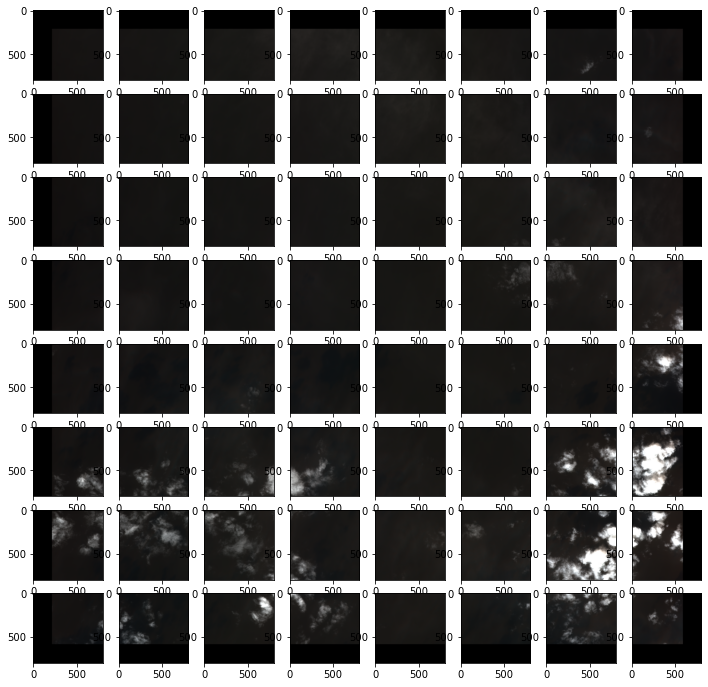

In [22]:
confirm_patch(validation_save_path, 3)

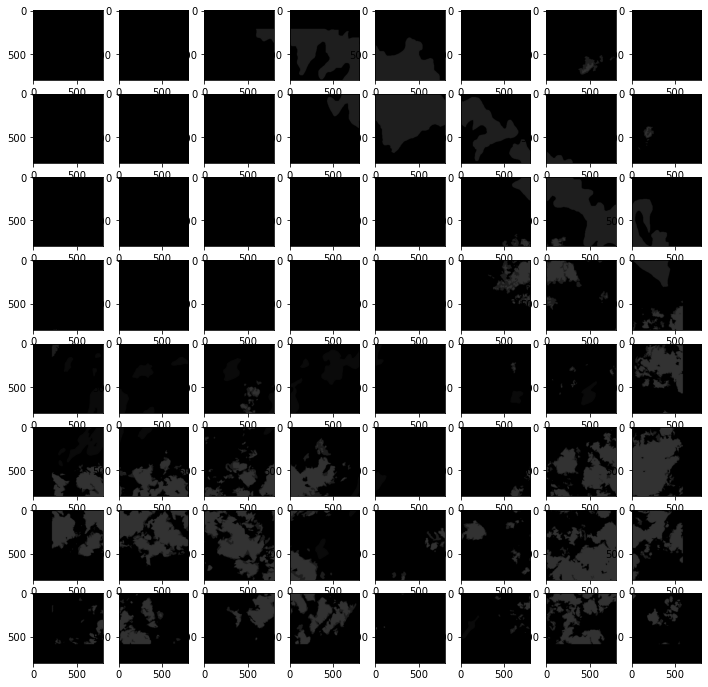

In [21]:
confirm_patch(validation_labeling_save_path, 3)